NAMES: MUPENZI CLEMENT
ID: 100771
PROJECT: STOCK MARKET PREDICTION 'META'

Import libraries

In [7]:
pip install yfinance


Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import yfinance as yf 

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

lets download our dataset using yahoo finance library 
our date range is for 11 years

In [8]:
start = '2012-01-01'
end = '2023-12-19'
stock = 'META'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


preview our dataset

In [9]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200
...,...,...,...,...,...,...
2023-12-12,324.600006,334.470001,324.559998,334.220001,334.220001,18485500
2023-12-13,333.929993,338.369995,332.640015,334.739990,334.739990,16353300
2023-12-14,333.850006,334.700012,328.640015,333.170013,333.170013,19607300


Step 1. Data Pre Processing

lets give our dataset indexes

In [10]:
data.reset_index(inplace=True)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200
...,...,...,...,...,...,...,...
2910,2023-12-12,324.600006,334.470001,324.559998,334.220001,334.220001,18485500
2911,2023-12-13,333.929993,338.369995,332.640015,334.739990,334.739990,16353300
2912,2023-12-14,333.850006,334.700012,328.640015,333.170013,333.170013,19607300
2913,2023-12-15,331.989990,338.660004,331.220001,334.920013,334.920013,30001600


In [11]:
#Let's see columns of data
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [6]:
#lets check the shape
data.shape

(2915, 7)

AS WE CAN SEE WE HAVE (2915) OBSERVATION


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2915 entries, 0 to 2914
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2915 non-null   datetime64[ns]
 1   Open       2915 non-null   float64       
 2   High       2915 non-null   float64       
 3   Low        2915 non-null   float64       
 4   Close      2915 non-null   float64       
 5   Adj Close  2915 non-null   float64       
 6   Volume     2915 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 159.5 KB


In [13]:
#describe hepls us to see mean,count,std,min,max and percentages

data.describe() .T

,count,mean,std,min,25%,50%,75%,max
Open,2915.0,1.570802e+02,9.040421e+01,1.808000e+01,8.064000e+01,1.533400e+02,2.034350e+02,3.816800e+02
High,2915.0,1.591258e+02,9.157435e+01,1.827000e+01,8.138500e+01,1.552000e+02,2.069350e+02,3.843300e+02
Low,2915.0,1.551013e+02,8.930683e+01,1.755000e+01,8.007500e+01,1.513400e+02,2.011600e+02,3.788100e+02
Close,2915.0,1.571549e+02,9.046597e+01,1.773000e+01,8.069500e+01,1.532400e+02,2.040500e+02,3.821800e+02
Adj Close,2915.0,1.571549e+02,9.046597e+01,1.773000e+01,8.069500e+01,1.532400e+02,2.040500e+02,3.821800e+02
Volume,2915.0,3.065062e+07,2.639284e+07,5.467500e+06,1.637125e+07,2.300090e+07,3.523315e+07,5.735764e+08


In [14]:
#missing values
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

OUR DATASET HAVE NO MISSING VALUES!! GREAT

100-day moving average along with the closing prices 


Moving Average is calculated by adding up all the close prices during a specific period and dividing the sum by the number of time periods.

In [15]:
ma_100_days = data['Close'].rolling(100).mean()

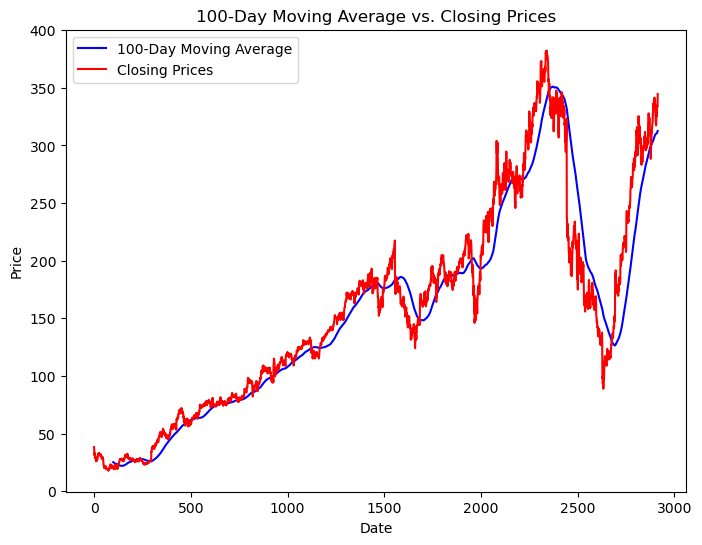

In [16]:
plt.figure(figsize=(8, 6))
plt.plot(ma_100_days, 'b', label='100-Day Moving Average')
plt.plot(data['Close'], 'r', label='Closing Prices')
plt.legend()  # Show legend
plt.title('100-Day Moving Average vs. Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

200-day moving average along with the closing prices 

In [17]:
ma_200_days = data['Close'].rolling(200).mean()

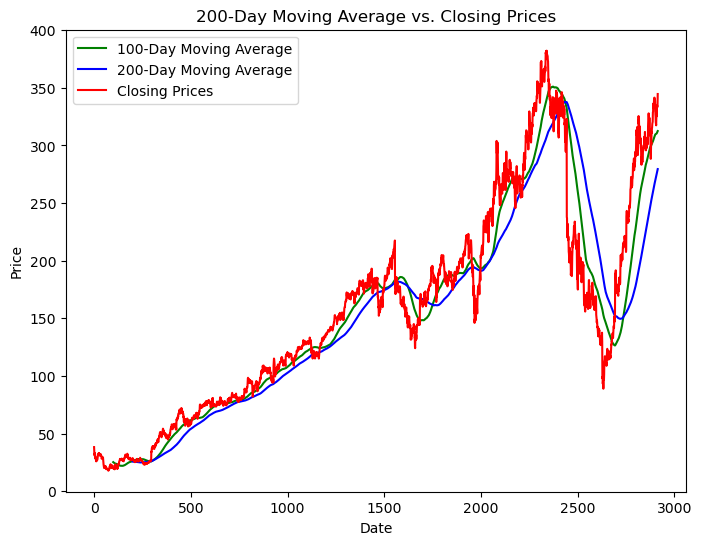

In [18]:
plt.figure(figsize=(8, 6))
plt.plot(ma_100_days, 'g', label='100-Day Moving Average')
plt.plot(ma_200_days, 'b', label='200-Day Moving Average')
plt.plot(data['Close'], 'r', label='Closing Prices')
plt.legend()  # Show legend
plt.title('200-Day Moving Average vs. Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

 use one portion of the data for training a model (data_train) and the other portion for testing or validating the model (data_test).

In [19]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [20]:
data_train.shape[0], data_test.shape[0]

(2332, 583)

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [22]:
data_train_scale = scaler.fit_transform(data_train)

The idea is to use the past 100 data points to predict the next data point, creating a sliding window of historical data for training the model.

In [23]:
x = []
y = []

for i in range (100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [24]:
x, y = np.array(x), np.array(y)

Step 2. Now lets create our Model

In [25]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

LSTM-based neural network with multiple layers and dropout regularization for sequence prediction. The architecture is designed to capture and learn patterns in sequential data, with the final output being a single continuous value.

In [26]:
model = Sequential()
model.add(LSTM(units= 50, activation= 'relu', return_sequences= True, input_shape = ((x.shape[1], 1))))
model.add(Dropout(0.2))

model.add(LSTM(units= 60, activation= 'relu', return_sequences= True))
model.add(Dropout(0.3))

model.add(LSTM(units= 80, activation= 'relu', return_sequences= True))
model.add(Dropout(0.4))

model.add(LSTM(units= 120, activation= 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units= 1))

lets compile our model

In [27]:
model.compile(optimizer= 'adam', loss = 'mean_squared_error')

lets fit our model

In [28]:
model.fit(x,y, epochs = 50, batch_size = 32, verbose= 1)

Epoch 1/50

70/70 [==============================] - 16s 158ms/step - loss: 0.0267
Epoch 2/50
70/70 [==============================] - 12s 171ms/step - loss: 0.0059
Epoch 3/50
70/70 [==============================] - 11s 160ms/step - loss: 0.0052
Epoch 4/50
70/70 [==============================] - 11s 159ms/step - loss: 0.0055
Epoch 5/50
70/70 [==============================] - 12s 171ms/step - loss: 0.0046
Epoch 6/50
70/70 [==============================] - 12s 170ms/step - loss: 0.0045
Epoch 7/50
70/70 [==============================] - 12s 166ms/step - loss: 0.0037
Epoch 8/50
70/70 [==============================] - 12s 170ms/step - loss: 0.0038
Epoch 9/50
70/70 [==============================] - 12s 167ms/step - loss: 0.0035
Epoch 10/50
70/70 [==============================] - 12s 169ms/step - loss: 0.0032
Epoch 11/50
70/70 [==============================] - 12s 166ms/step - loss: 0.0031
Epoch 12/50
70/70 [==============================] - 12s 175ms/step - loss: 0.0040
Epoch 13/50


Model summary

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

Step 3 Test Model

In [31]:
pas_100_days = data_train.tail(100)

In [32]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [33]:
data_test_scale = scaler.fit_transform(data_test)

In [34]:
x = []
y = []

for i in range (100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [35]:
y_predict = model.predict(x)

19/19 [==============================] - 2s 48ms/step


In [36]:
y_predict

array([[0.9356235 ],
       [0.9357462 ],
       [0.9364701 ],
       [0.93799704],
       [0.94065934],
       [0.9444928 ],
       [0.94939977],
       [0.95484984],
       [0.960347  ],
       [0.96574605],
       [0.9707523 ],
       [0.97515345],
       [0.97885805],
       [0.9817602 ],
       [0.9838353 ],
       [0.98501664],
       [0.98529273],
       [0.9844023 ],
       [0.981882  ],
       [0.977656  ],
       [0.9713767 ],
       [0.9631701 ],
       [0.95379025],
       [0.9441375 ],
       [0.9344751 ],
       [0.9249454 ],
       [0.91571766],
       [0.9071608 ],
       [0.8989049 ],
       [0.89093137],
       [0.88339335],
       [0.8763069 ],
       [0.8697469 ],
       [0.8636136 ],
       [0.85777366],
       [0.8522113 ],
       [0.8471621 ],
       [0.8426936 ],
       [0.8392672 ],
       [0.8373932 ],
       [0.8373418 ],
       [0.8391059 ],
       [0.8416693 ],
       [0.8442459 ],
       [0.8457298 ],
       [0.84530234],
       [0.8428488 ],
       [0.838

In [37]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Calculate Mean Squared Error
mse = mean_squared_error(y, y_predict)

# Calculate Root Mean Squared Error
rmse = sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 0.06439402790243315


Great! our model's Root Mean Squared Error (RMSE) is 0.06439402790243315. This number represents the standard deviation of the residuals (prediction errors).


In the context of our stock market prediction model, a lower RMSE value is generally better as it indicates that the predictions are closer to the actual values

In [38]:
scale = 1/scaler.scale_

In [39]:
y_predict = y_predict*scale

In [40]:
y = y*scale

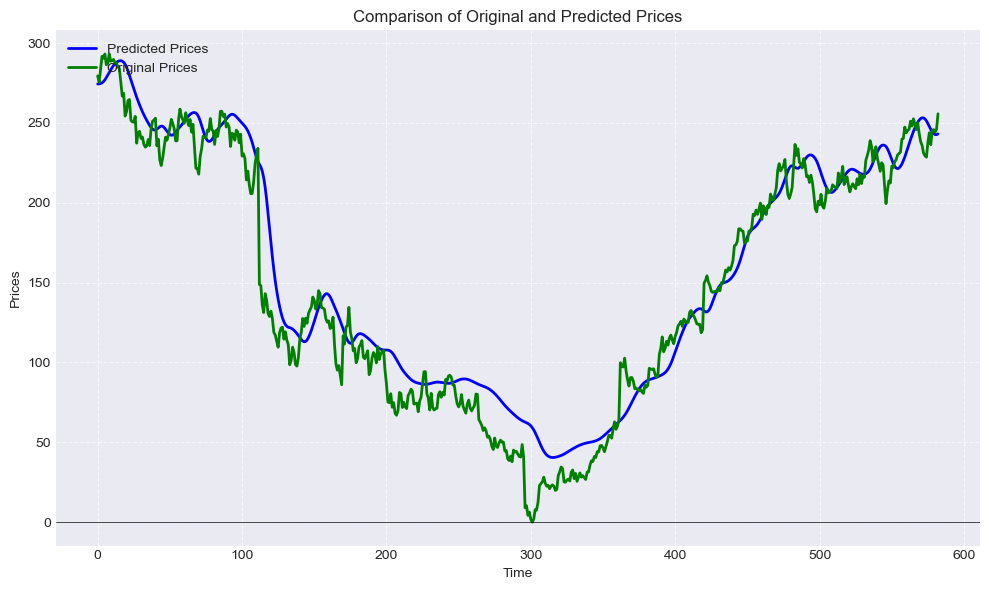

In [41]:
with plt.style.context('seaborn-darkgrid'):  #
    plt.figure(figsize=(10, 6))

    # Plot predicted prices with a solid blue line
    plt.plot(y_predict, 'b', label='Predicted Prices', linewidth=2)

    # Plot original prices with a solid green line
    plt.plot(y, 'g', label='Original Prices', linewidth=2)

    # Customize axes labels and title
    plt.xlabel('Time')
    plt.ylabel('Prices')
    plt.title('Comparison of Original and Predicted Prices')

    # Add a legend with a shadow for better visibility
    plt.legend(loc='upper left', shadow=True)

    # Customize the grid for better readability
    plt.grid(True, linestyle='--', alpha=0.7)

    # Add a horizontal line at y=0 for reference (assuming prices should be positive)
    plt.axhline(0, color='black', linewidth=0.5)

    # Tighten layout for better spacing
    plt.tight_layout()

    # Show the plot
    plt.show()

In [42]:
model.save('Stock Market Prediction Model.keras')